<a href="https://colab.research.google.com/github/NireAstro/1221-dark-matter/blob/main/1221_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print('Hello World!')

Hello World!


In [3]:
import numpy as np # import another module to deal with numbers

In [4]:
print(np.sqrt(16))

4.0


In [5]:
import matplotlib.pyplot as plt # import plotting module as plt

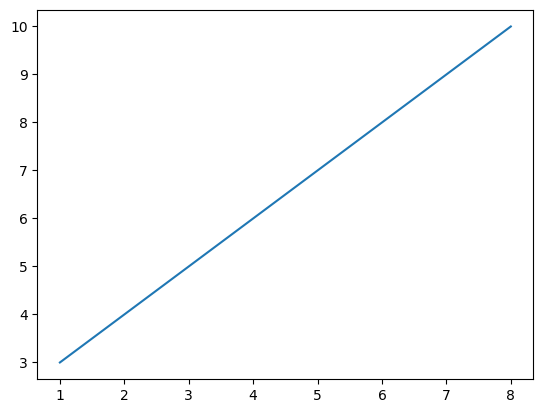

In [6]:
xpoints = np.array([1,8]) # an array is a group of numbers, create an array with two numbers 1 and 8,
                          # and store the array with the name points
ypoints = np.array ([3, 10]) # create an array with the numbers 3 and 10,
                             # and store the array with the name ypoints

plt.plot(xpoints, ypoints) # plot xpoints on the x-axis and ypoints on the y-axis,
                           # (linestyle lets you choose how the line is presented on the plot, dotted or if it appears at all)
                           # (marker allows you to change the endpoints of the line, for e.g., have the line start and end with dots)
plt.show()

In [7]:
# Orbital velocity: Sun-Earth System

In [8]:
import astropy.units as u
import astropy.constants as ac

$v_{orbital} = \sqrt\frac{GM_\odot}{r}$

In [9]:
ac.G.si

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [10]:
v_orbital = np.sqrt(ac.G * u.solMass / u.au)

In [11]:
print(v_orbital.si, v_orbital.to(u.km / u.s), v_orbital.to(ac.c))

29784.691829676933 m / s 29.784691829676934 km / s 9.935103780921979e-05 2.99792e+08 m / s


In [12]:
# Earth-Satellite System

In [13]:
v_satellite = np.sqrt(ac.G * u.earthMass / u.earthRad)

In [14]:
print(v_satellite.to(u.km / u.s))

7.905388234385281 km / s


In [15]:
# Black Hole - Photon System

In [16]:
r_schwachild = ac.G * u.solMass / ac.c**2
print(r_schwachild.to(u.km))

1.476625038050125 km


In [17]:
# Class Demo

In [18]:
from google.colab import files

In [19]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [20]:
import astropy.io.ascii # Helps to read in files

In [21]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt") # Reading in the file using the program above.

In [22]:
tab # showing the data within the file.

col1,col2,col3,col4
float64,float64,float64,float64
25.0,5.68,235.5,17.8
30.0,6.81,242.9,0.8
35.0,7.95,251.1,0.7
40.0,9.08,262.0,2.1
45.0,10.22,258.9,6.9
50.0,11.35,255.1,5.7
55.0,12.49,251.8,17.1
60.0,13.62,252.1,7.4
65.0,14.76,251.0,18.6


Text(0, 0.5, 'Velocity[km/s]')

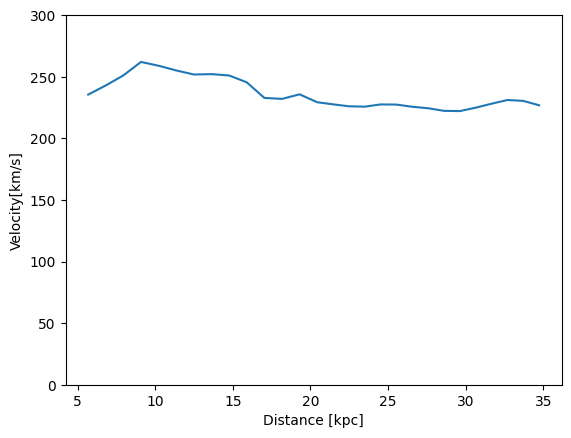

In [23]:
dis = tab["col2"] # putting the data in the 2nd column under the "name" dis for distance.
vel = tab["col3"] # naming the 3rd column of the data vel for velocity.
plt.plot(dis, vel) # plotting dis as the x-value and vel as the y-value.

plt.ylim(0,300) # setting the limits of the y-axis.

plt.xlabel("Distance [kpc]") # labelling the x-axis.
plt.ylabel("Velocity[km/s]") # Labelling the y-axis.

In [24]:
print(dis) # showing the data in the 2nd column that is under the name dis.

 col2
-----
 5.68
 6.81
 7.95
 9.08
10.22
11.35
12.49
13.62
14.76
15.89
  ...
24.52
25.54
26.56
27.58
 28.6
29.62
30.65
31.67
32.69
33.71
34.73
Length = 28 rows


In [25]:
def calculate_orbital_velocity(mass, radius): # creating a loop that will help us make this calculation multiple times.
  return(np.sqrt(ac.G * mass/ radius))

In [26]:
mass = 1 * u.earthMass # giving the mass a number value according to the elements of the loop.
radius = 1 * u.earthRad # giving the radius a number value to be able to calculate the orbital velocity fo an object.
orb_vel = calculate_orbital_velocity(mass, radius) # putting the loop under a shorter to make the process more efficent.
print(orb_vel.to(u.km / u.s)) # showing the results of the calculation as well as converting the answer to km/s.

7.905388234385281 km / s


In [27]:
mass = 3e7 * u.solMass # giving mass a different value from the assumed mass of M13 black hole.
radius = 5.68 * 1000 * u.parsec # giving radius another value from the data file and converting it to kpc.
orb_vel = calculate_orbital_velocity(mass, radius)# putting the loop under a shorter to make the process more efficent.
print(orb_vel.to(u.km / u.s)) # showing the results of the calculation as well as converting the answer to km/s.

4.766142291386287 km / s


In [28]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s
# create velocty array to create same number of elements as the distance array.

for i, radius in enumerate(dis): # creating an array or loop that will allow us to calculate the orbital velocity with all of the data at once.
  rad = radius * 1000 * u.parsec
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_bh[i] = orb_vel
  # print("The orbital velocity at", radius, "kpc =", orb_vel.to(u.km / u.s))

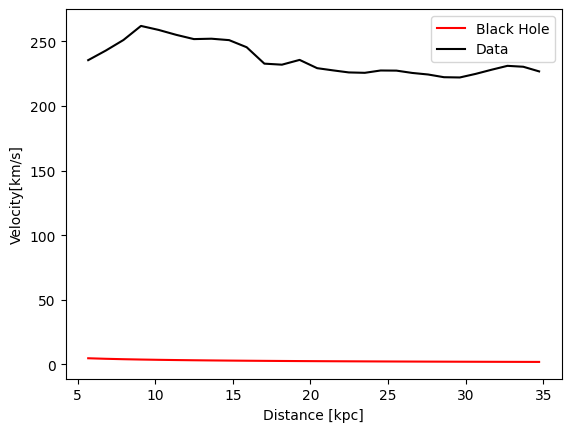

In [29]:
dis = tab["col2"] # plotting the first graph we made above with the new data in order to compare them.
vel = tab["col3"]
plt.plot(dis, vel_bh.value, color = "r", label = "Black Hole") # plotting the data for the black hole calculation and makingthe line red.
plt.plot(dis, vel, color = "k", label = "Data") # plotting the data from the first graph and making the line black.
plt.xlabel("Distance [kpc]") # labelling the x-axis.
plt.ylabel("Velocity[km/s]") # labelling the y-axis.
plt.legend() # creating a key that shows which data is which.

In [30]:
vel_bh[0] # showing the first result of the orbital velocity calculation from the data.

<Quantity 4.76614229 km / s>

In [31]:
# Adding Bulge

$v_{orbital} = \sqrt\frac{GM_\odot}{r}$

In [32]:
# mass of andromeda bulge = 3x10^10 solar masses
# radius is 3 kpc

In [33]:
def calculate_orbital_velocity(mass_bu, radius_bu): # creating a loop that will help us make this calculation multiple times.
  return(np.sqrt(ac.G * mass_bu/ radius_bu))

In [34]:
mass_bu = 3.9e10 * u.solMass # giving mass a different value from the assumed mass of M31 Bulge.
radius_bu = 5.68 * 1000 * u.parsec # giving radius another value from the data file and converting it to kpc.
orb_vel_bu = calculate_orbital_velocity(mass_bu, radius_bu)# putting the loop under a shorter to make the process more efficent.
print(orb_vel_bu.to(u.km / u.s)) # showing the results of the calculation as well as converting the answer to km/s.

171.84570417750683 km / s


In [35]:
vel_bu = np.zeros(np.shape(dis)) * u.km / u.s
# create velocty array to create same number of elements as the distance array.

for i, radius in enumerate(dis): # creating an array or loop that will allow us to calculate the orbital velocity with all of the data at once.
  rad = radius * 1000 * u.parsec
  orb_vel_bu = calculate_orbital_velocity(mass_bu, rad)
  vel_bu[i] = orb_vel_bu
# print("The orbital velocity at", radius, "kpc =", orb_vel_bu.to(u.km / u.s))

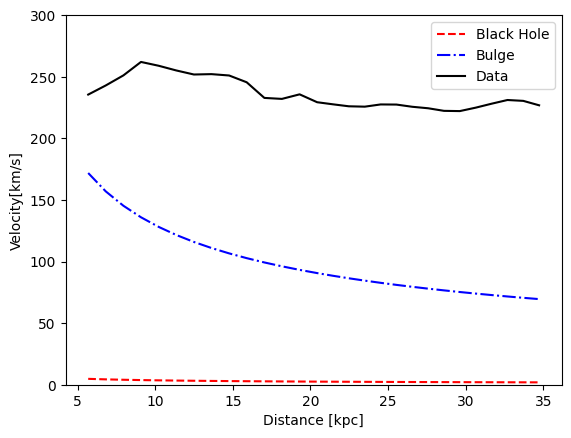

In [36]:
dis = tab["col2"] # plotting the first graph we made above with the new data in order to compare them.
vel = tab["col3"]

# plt.figure(figsize = (20,10))
plt.plot(dis, vel_bh.value, color = "r", linestyle = "dashed", label = "Black Hole") # plotting the data for the black hole calculation and making the line red and dashed.
plt.plot(dis, vel_bu.value, color = "b", linestyle = "dashdot", label = "Bulge") # plotting the data for the andromeda bulge calculation and making the line blue and dashdot.
plt.plot(dis, vel, color = "k", label = "Data") # plotting the data from the first graph and making the line black.

plt.ylim(0,300) # setting the limits of the y-axis.
plt.xlabel("Distance [kpc]") # labelling the x-axis.
plt.ylabel("Velocity[km/s]") # labelling the y-axis.
plt.legend() # creating a key that shows which data is which.

In [37]:
# Adding Disk -- 10e10

In [38]:
def calculate_disk_velocity(density, radius):
  return(np.sqrt(ac.G * density * radius * np.pi))

In [39]:
disk_mass = 7.28e10 * u.solMass
disk_radius = 30 * 1000 * u.parsec
density = disk_mass /(np.pi * disk_radius**2)
radius = 5e3 * u.parsec
orb_vel_disk = calculate_disk_velocity(density, radius)
print(orb_vel_disk.to(u.km / u.s))

41.707098866755764 km / s


In [40]:
vel_disk = np.zeros(np.shape(dis)) * u.km / u.s
# create velocty array to create same number of elements as the distance array.

for i, radius in enumerate(dis): # creating an array or loop that will allow us to calculate the orbital velocity with all of the data at once.
  rad = radius * 1000 * u.parsec
  orb_vel_disk = calculate_disk_velocity(density, rad)
  vel_disk[i] = orb_vel_disk
  print("The orbital velocity at", radius, "kpc =", orb_vel_disk.to(u.km / u.s))

The orbital velocity at 5.68 kpc = 44.45280262167058 km / s
The orbital velocity at 6.81 kpc = 48.67416783665013 km / s
The orbital velocity at 7.95 kpc = 52.59065061825467 km / s
The orbital velocity at 9.08 kpc = 56.20408780614195 km / s
The orbital velocity at 10.22 kpc = 59.628025323512595 km / s
The orbital velocity at 11.35 kpc = 62.8380804739502 km / s
The orbital velocity at 12.49 kpc = 65.91833034529613 km / s
The orbital velocity at 13.62 kpc = 68.8356682918149 km / s
The orbital velocity at 14.76 kpc = 71.6585734371102 km / s
The orbital velocity at 15.89 kpc = 74.35101950014472 km / s
The orbital velocity at 17.03 kpc = 76.97191707741108 km / s
The orbital velocity at 18.16 kpc = 79.48458323625422 km / s
The orbital velocity at 19.3 kpc = 81.9414479375485 km / s
The orbital velocity at 20.43 kpc = 84.30613170921293 km / s
The orbital velocity at 21.45 kpc = 86.38505768552191 km / s
The orbital velocity at 22.47 kpc = 88.41511487800456 km / s
The orbital velocity at 23.5 kpc

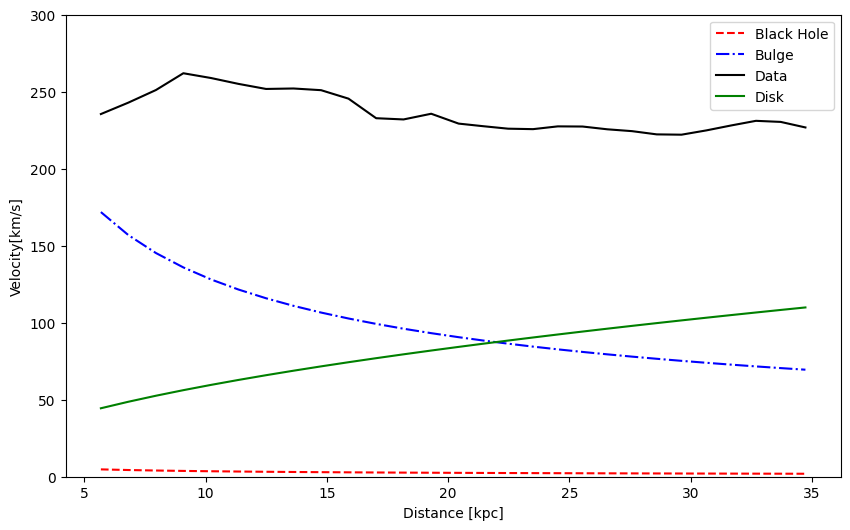

In [41]:
dis = tab["col2"] # plotting the first graph we made above with the new data in order to compare them.
vel = tab["col3"]

plt.figure(figsize = (10, 6))
# plt.figure(figsize = (20,10))
plt.plot(dis, vel_bh.value, color = "r", linestyle = "dashed", label = "Black Hole") # plotting the data for the black hole calculation and making the line red and dashed.
plt.plot(dis, vel_bu.value, color = "b", linestyle = "dashdot", label = "Bulge") # plotting the data for the andromeda bulge calculation and making the line blue and dashdot.
plt.plot(dis, vel, color = "k", label = "Data") # plotting the data from the first graph and making the line black.
plt.plot(dis, vel_disk.value, color = "g", label = "Disk")

plt.ylim(0,300) # setting the limits of the y-axis.

plt.xlabel("Distance [kpc]") # labelling the x-axis.
plt.ylabel("Velocity[km/s]") # labelling the y-axis.
plt.legend(loc = "upper right") # creating a key that shows which data is which.

In [42]:
# Adding Halo

In [43]:
def calculate_halo_velocity(density, radius):
  return(np.sqrt(ac.G * density * (4/3) * np.pi * radius ** 2))

In [44]:
mass_h = 4.76e10 * u.solMass
radius_h = 35e3 * u.parsec
test_radius = 20 * 1000 * u.parsec
density_h = (mass_h) / (np.pi * (4/3) * (radius_h) ** 3)
orb_vel_halo = calculate_halo_velocity(density_h, test_radius)
print(orb_vel_halo.to(u.km / u.s))

43.703070409108086 km / s


In [45]:
vel_halo = np.zeros(np.shape(dis)) * u.km / u.s

for i, radius in enumerate(dis): # creating an array or loop that will allow us to calculate the orbital velocity with all of the data at once.
  rad = radius * 1000 * u.parsec
  orb_vel_halo = calculate_halo_velocity(density_h, rad)
  vel_halo[i] = orb_vel_halo
  print("The orbital velocity at", radius, "kpc =", orb_vel_halo.to(u.km / u.s))

The orbital velocity at 5.68 kpc = 12.411671996186696 km / s
The orbital velocity at 6.81 kpc = 14.880895474301303 km / s
The orbital velocity at 7.95 kpc = 17.371970487620462 km / s
The orbital velocity at 9.08 kpc = 19.84119396573507 km / s
The orbital velocity at 10.22 kpc = 22.33226897905423 km / s
The orbital velocity at 11.35 kpc = 24.801492457168838 km / s
The orbital velocity at 12.49 kpc = 27.292567470488 km / s
The orbital velocity at 13.62 kpc = 29.761790948602606 km / s
The orbital velocity at 14.76 kpc = 32.25286596192176 km / s
The orbital velocity at 15.89 kpc = 34.72208944003637 km / s
The orbital velocity at 17.03 kpc = 37.21316445335553 km / s
The orbital velocity at 18.16 kpc = 39.68238793147014 km / s
The orbital velocity at 19.3 kpc = 42.1734629447893 km / s
The orbital velocity at 20.43 kpc = 44.64268642290391 km / s
The orbital velocity at 21.45 kpc = 46.87154301376842 km / s
The orbital velocity at 22.47 kpc = 49.10039960463293 km / s
The orbital velocity at 23.

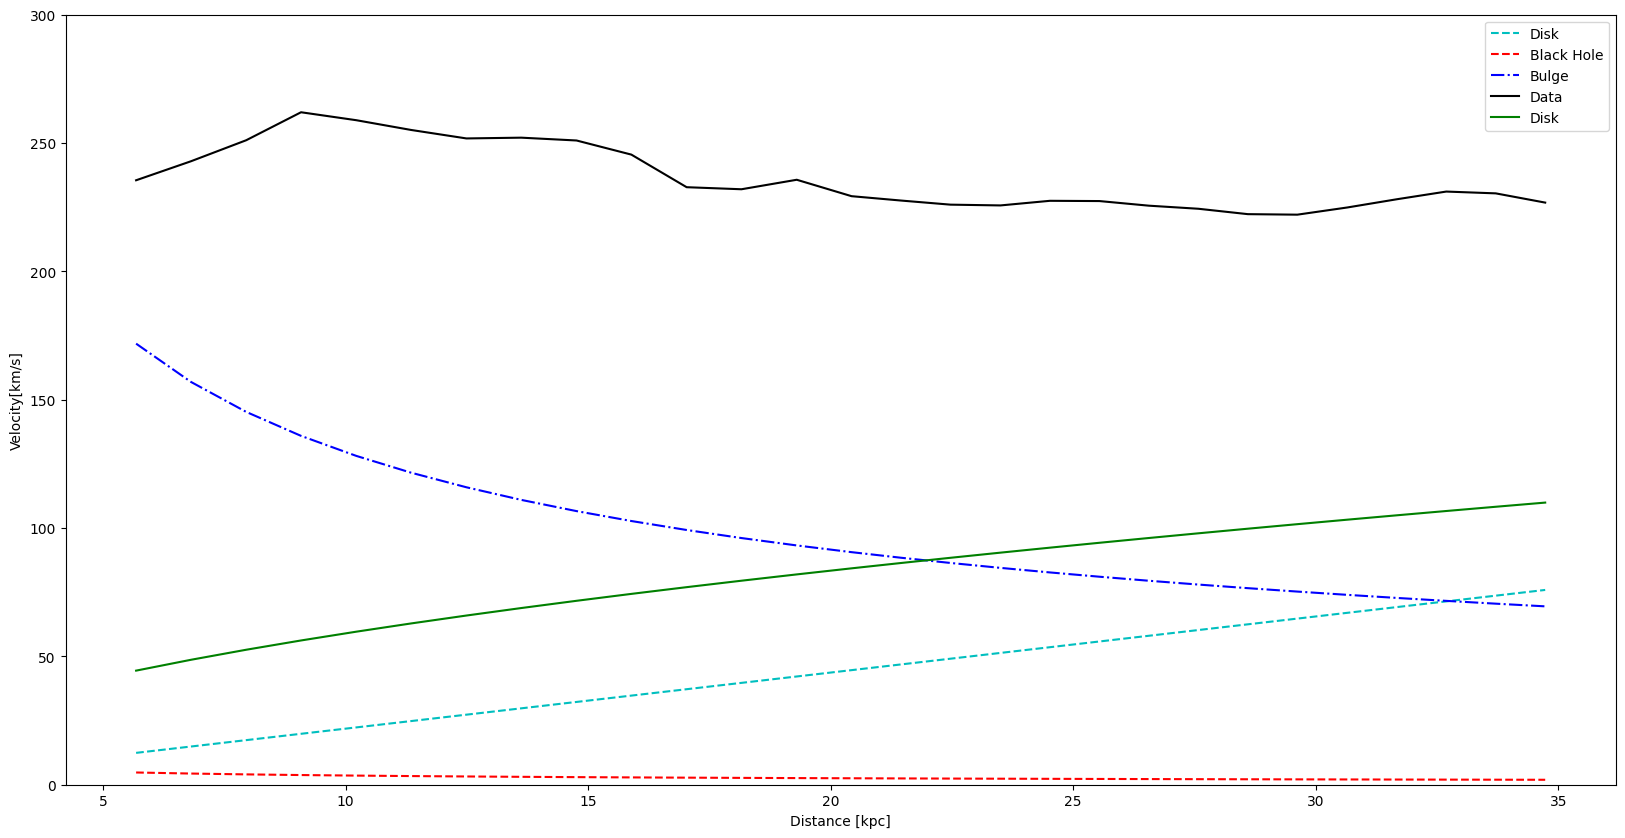

In [46]:
dis = tab["col2"] # plotting the first graph we made above with the new data in order to compare them.
vel = tab["col3"]

plt.figure(figsize = (20, 10))
# plt.figure(figsize = (20,10))
plt.plot(dis, vel_halo.value, color = "c", linestyle ="dashed", label = "Disk")
plt.plot(dis, vel_bh.value, color = "r", linestyle = "dashed", label = "Black Hole") # plotting the data for the black hole calculation and making the line red and dashed.
plt.plot(dis, vel_bu.value, color = "b", linestyle = "dashdot", label = "Bulge") # plotting the data for the andromeda bulge calculation and making the line blue and dashdot.
plt.plot(dis, vel, color = "k", label = "Data") # plotting the data from the first graph and making the line black.
plt.plot(dis, vel_disk.value, color = "g", label = "Disk")

plt.ylim(0,300) # setting the limits of the y-axis.
plt.xlabel("Distance [kpc]") # labelling the x-axis.
plt.ylabel("Velocity[km/s]") # labelling the y-axis.
plt.legend(loc = "upper right") # creating a key that shows which data is which.

In [47]:
# total orbital velocity
def calculate_total_velocity(radius, density, density_h, mass_bu, mass):
  disk_mass = density * (np.pi * radius **2)
  mass_h = density_h * (4/3 * np.pi * radius **3)
  return np.sqrt(ac.G * (disk_mass + mass_h + mass_bu + mass) / radius)

In [48]:
vel_total = np.zeros(np.shape(dis)) * u.km / u.s

mass = 3e7 * u.solMass
mass_bu =  3.9e10 * u.solMass
for i, radius in enumerate (dis):
  rad = radius * 1000 * u.parsec
  orb_vel_total = calculate_total_velocity(rad, density, density_h, mass_bu, mass)
  vel_total[i] = orb_vel_total
  print("The orbital velocity at", radius, "kpc =", orb_vel_total.to(u.km / u.s))

The orbital velocity at 5.68 kpc = 177.99933544613887 km / s
The orbital velocity at 6.81 kpc = 165.04655763125936 km / s
The orbital velocity at 7.95 kpc = 155.50765642076476 km / s
The orbital velocity at 9.08 kpc = 148.45836236137828 km / s
The orbital velocity at 10.22 kpc = 143.10611079193023 km / s
The orbital velocity at 11.35 kpc = 139.117176144739 km / s
The orbital velocity at 12.49 kpc = 136.1251135809636 km / s
The orbital velocity at 13.62 kpc = 133.97383584215117 km / s
The orbital velocity at 14.76 kpc = 132.4694399114155 km / s
The orbital velocity at 15.89 kpc = 131.52139138026882 km / s
The orbital velocity at 17.03 kpc = 131.02099440022334 km / s
The orbital velocity at 18.16 kpc = 130.90510811134396 km / s
The orbital velocity at 19.3 kpc = 131.1131570526949 km / s
The orbital velocity at 20.43 kpc = 131.59436462819602 km / s
The orbital velocity at 21.45 kpc = 132.2315566973927 km / s
The orbital velocity at 22.47 kpc = 133.03646278187807 km / s
The orbital velocit

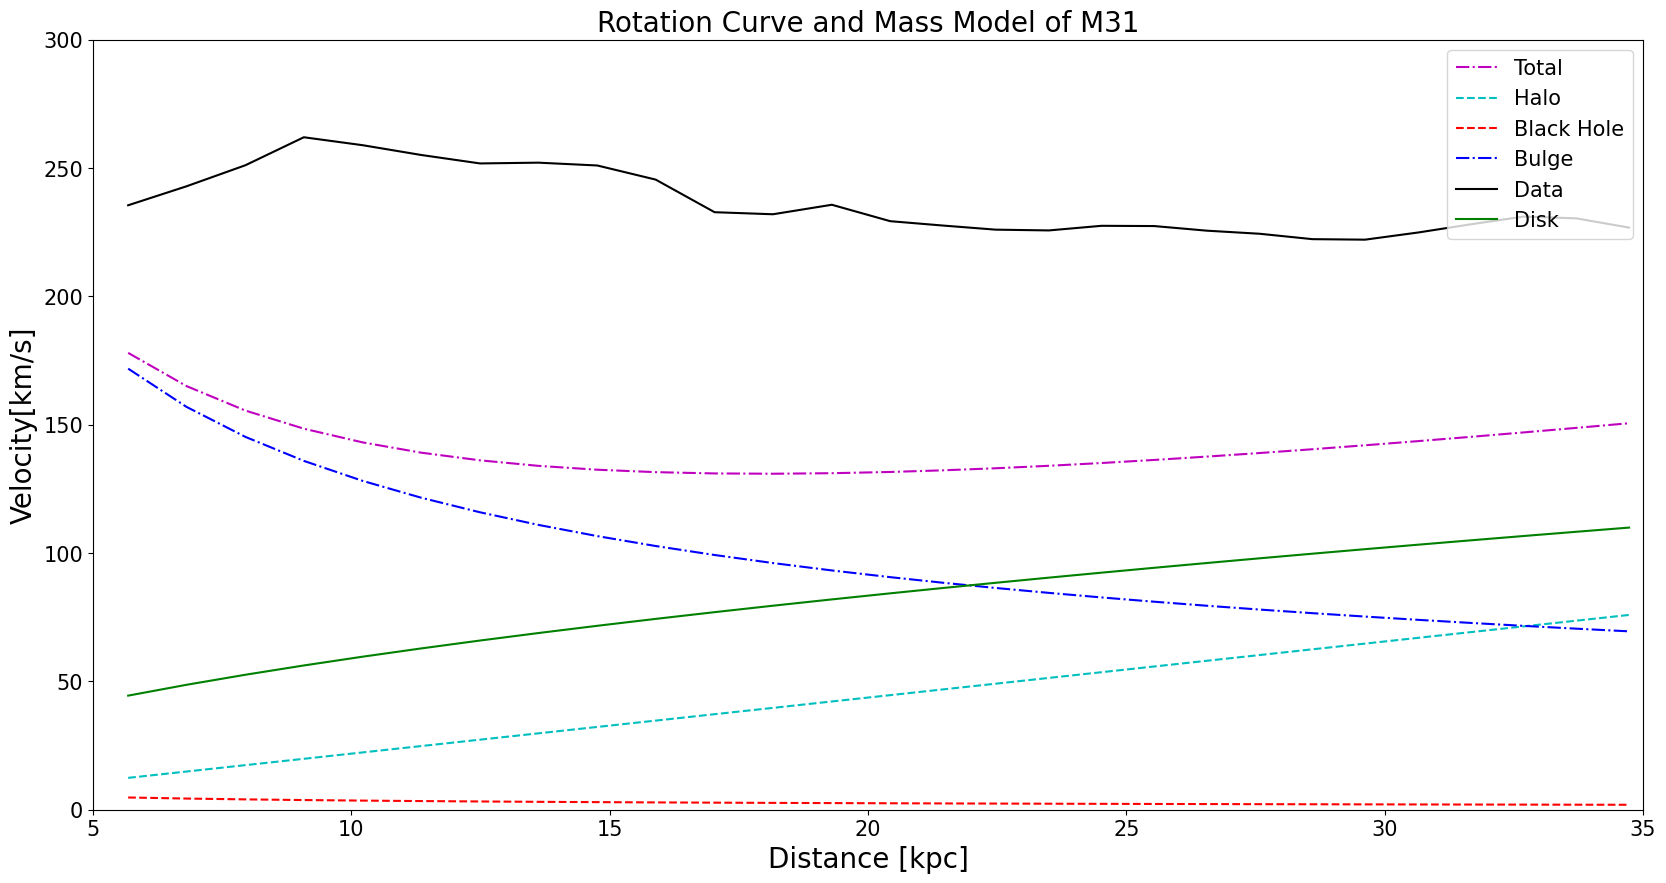

In [49]:
dis = tab["col2"] # plotting the first graph we made above with the new data in order to compare them.
vel = tab["col3"]

ts = 15
fs = 20

plt.figure(figsize = (20, 10))
plt.tight_layout()

plt.plot(dis, vel_total.value, color = "m", linestyle ="dashdot", label = "Total")
plt.plot(dis, vel_halo.value, color = "c", linestyle ="dashed", label = "Halo")
plt.plot(dis, vel_bh.value, color = "r", linestyle = "dashed", label = "Black Hole") # plotting the data for the black hole calculation and making the line red and dashed.
plt.plot(dis, vel_bu.value, color = "b", linestyle = "dashdot", label = "Bulge") # plotting the data for the andromeda bulge calculation and making the line blue and dashdot.
plt.plot(dis, vel, color = "k", label = "Data") # plotting the data from the first graph and making the line black.
plt.plot(dis, vel_disk.value, color = "g", label = "Disk")

plt.ylim(0,300) # setting the limits of the y-axis.
plt.xlim(5,35)
plt.xlabel("Distance [kpc]", fontsize = fs) # labelling the x-axis.
plt.ylabel("Velocity[km/s]", fontsize = fs) # labelling the y-axis.
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)

plt.title('Rotation Curve and Mass Model of M31', fontsize=fs)
plt.legend(loc = "upper right", fontsize = 15) # creating a key that shows which data is which.


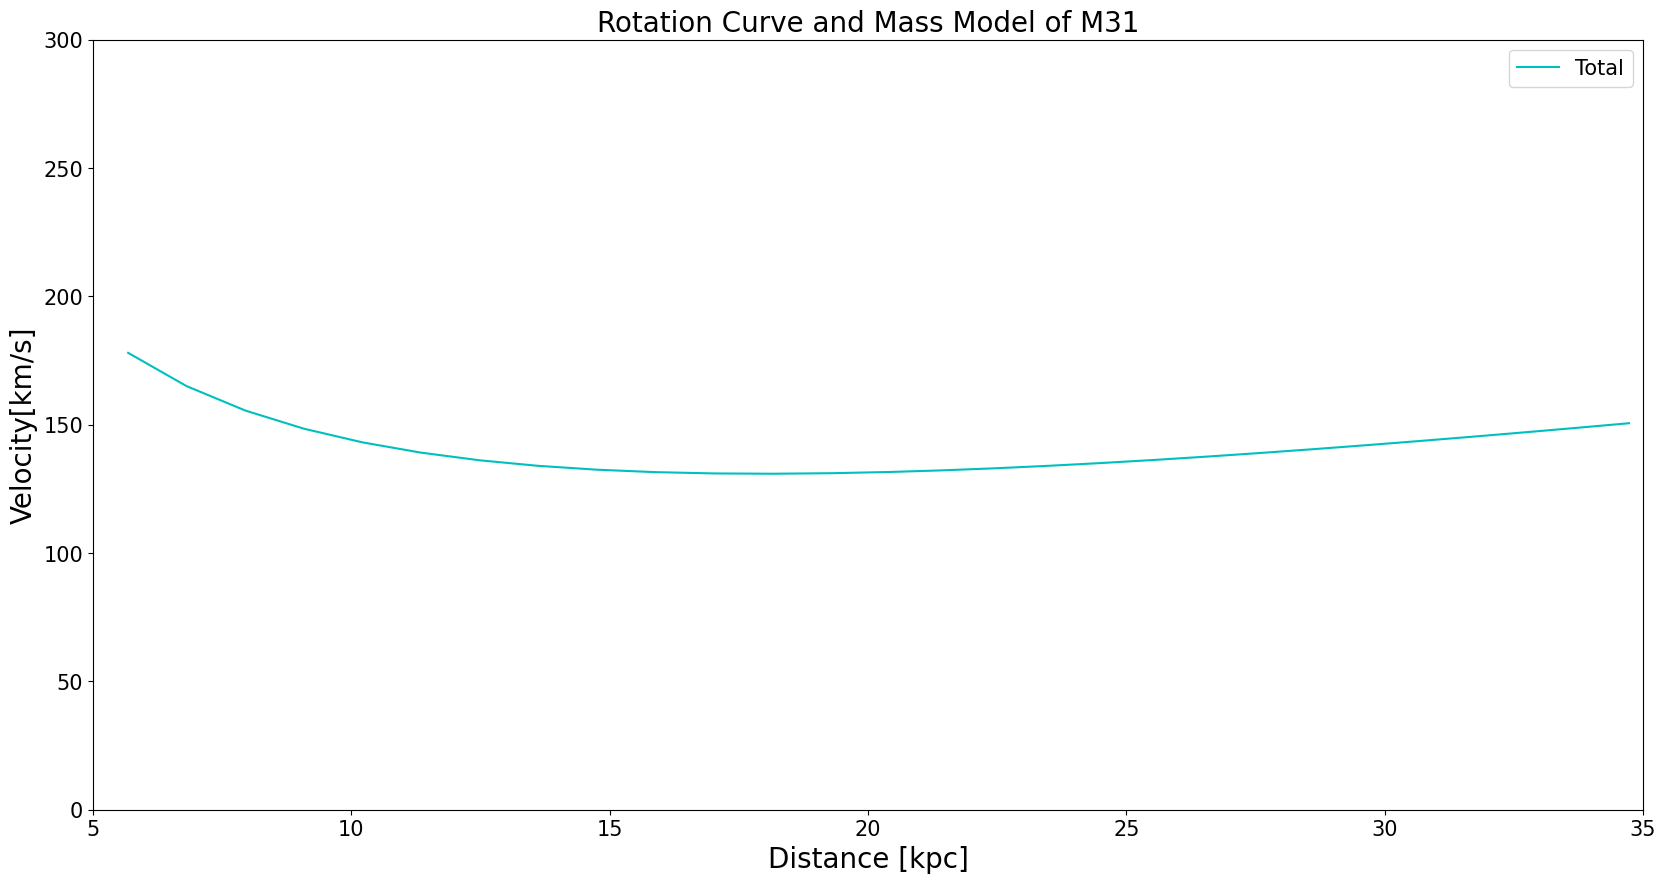

In [50]:
dis = tab["col2"] # plotting the first graph we made above with the new data in order to compare them.
vel = tab["col3"]

ts = 15
fs = 20

plt.figure(figsize = (20, 10))
plt.tight_layout()

plt.plot(dis, vel_total.value, color = "c", linestyle ="solid", label = "Total")
#plt.plot(dis, vel_expected.value, color ="k", linestyle ="dashdot", label ="Expected")

plt.ylim(0,300) # setting the limits of the y-axis.
plt.xlim(5,35)
plt.xlabel("Distance [kpc]", fontsize = fs) # labelling the x-axis.
plt.ylabel("Velocity[km/s]", fontsize = fs) # labelling the y-axis.
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)

plt.title('Rotation Curve and Mass Model of M31', fontsize=fs)
plt.legend(loc = "upper right", fontsize = 15) # creating a key that shows which data is which.


In [51]:
# Expected
def calculate_expected_velocity(radius, density, mass_bu, mass):
  disk_mass = density * (np.pi * radius **2)
  #mass_h = density_h * (4/3 * np.pi * radius **3)
  return np.sqrt(ac.G * (disk_mass + mass_bu + mass) / radius)

In [52]:
vel_expected = np.zeros(np.shape(dis)) * u.km / u.s

mass = 3e7 * u.solMass
mass_bu =  1.02e11 * u.solMass
for i, radius in enumerate (dis):
  rad = radius * 1000 * u.parsec
  orb_vel_expected = calculate_expected_velocity(rad, density, mass_bu, mass)
  vel_expected[i] = orb_vel_expected
  print("The orbital velocity at", radius, "kpc =", orb_vel_expected.to(u.km / u.s))

The orbital velocity at 5.68 kpc = 281.4845461747093 km / s
The orbital velocity at 6.81 kpc = 258.4707847643053 km / s
The orbital velocity at 7.95 kpc = 240.75628024484024 km / s
The orbital velocity at 9.08 kpc = 226.90830407388043 km / s
The orbital velocity at 10.22 kpc = 215.62266213837805 km / s
The orbital velocity at 11.35 kpc = 206.4253073993155 km / s
The orbital velocity at 12.49 kpc = 198.6935845261764 km / s
The orbital velocity at 13.62 kpc = 192.24290678780187 km / s
The orbital velocity at 14.76 kpc = 186.72300035415006 km / s
The orbital velocity at 15.89 kpc = 182.05589196383485 km / s
The orbital velocity at 17.03 kpc = 178.02330527233485 km / s
The orbital velocity at 18.16 kpc = 174.59106064751157 km / s
The orbital velocity at 19.3 kpc = 171.61387648773828 km / s
The orbital velocity at 20.43 kpc = 169.07645557892727 km / s
The orbital velocity at 21.45 kpc = 167.09370949057808 km / s
The orbital velocity at 22.47 kpc = 165.36776511667256 km / s
The orbital veloc

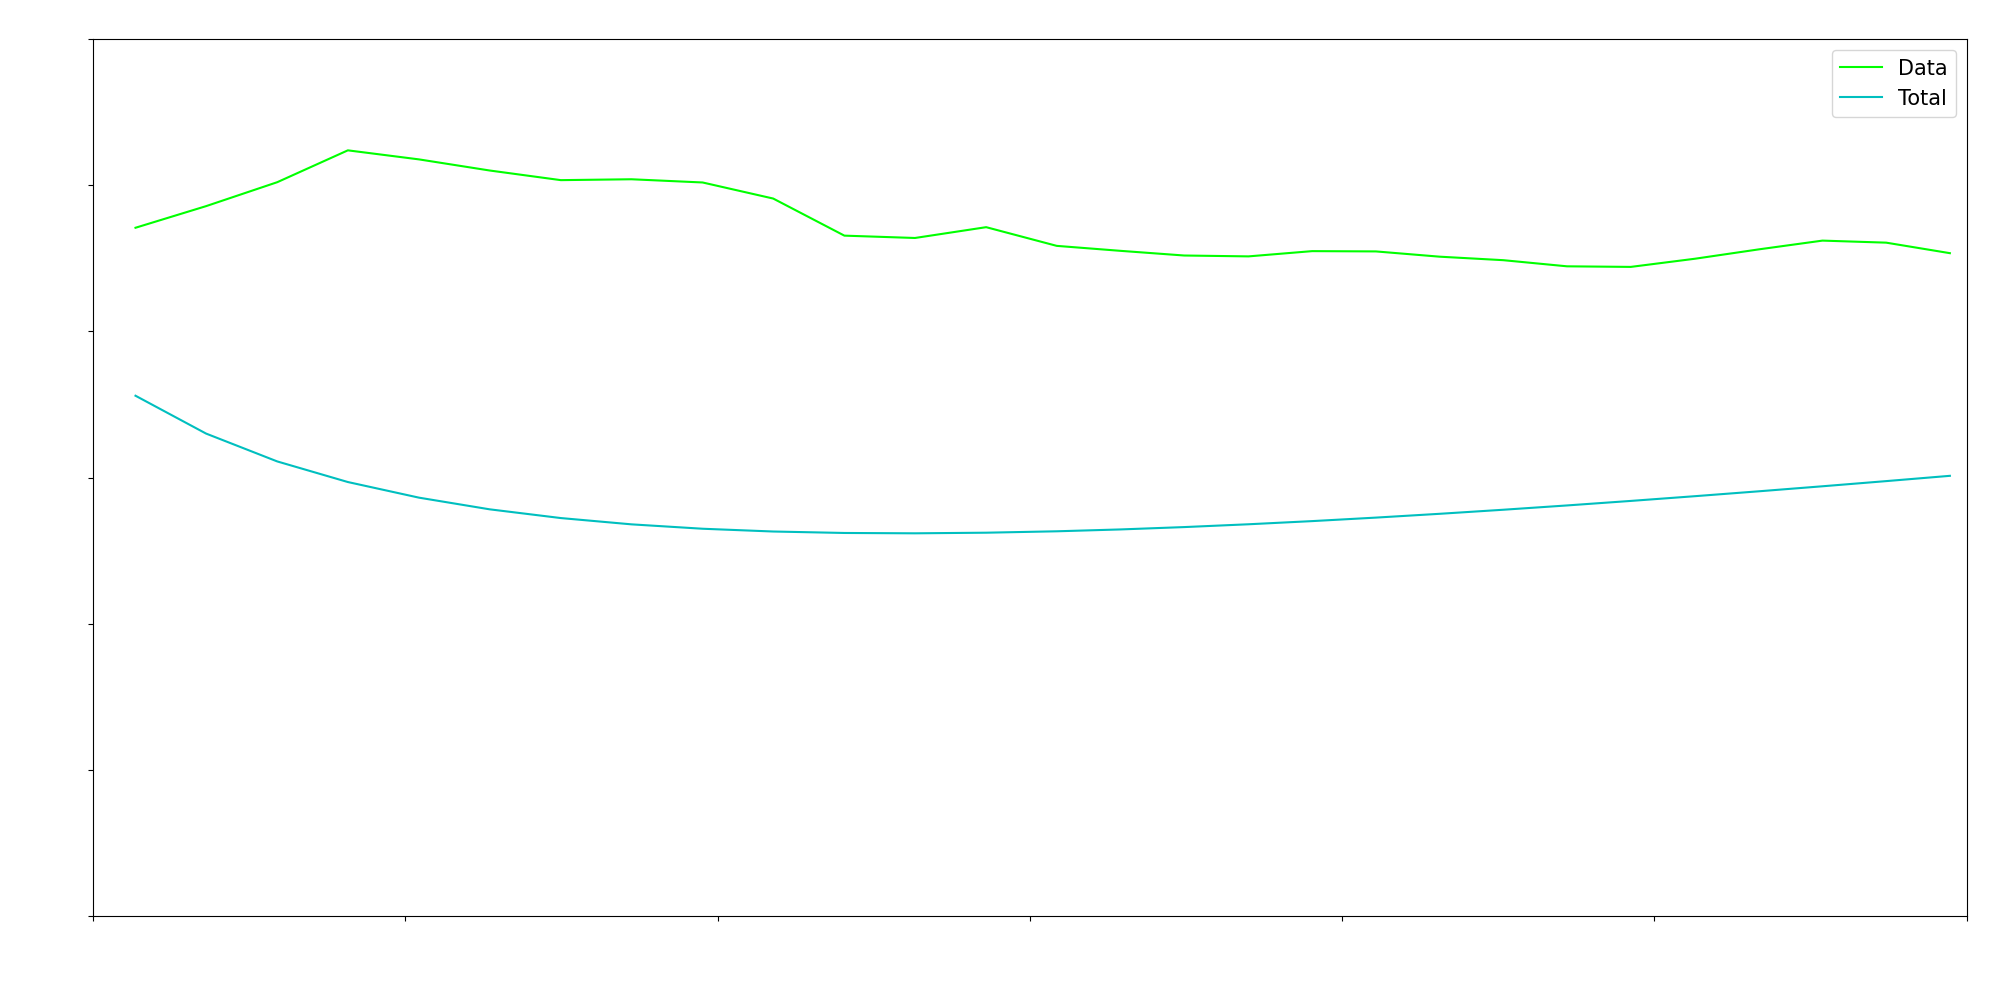

In [106]:
from astropy.units.equivalencies import plate_scale
dis = tab["col2"] # plotting the first graph we made above with the new data in order to compare them.
vel = tab["col3"]

ts = 15
fs = 20

plt.figure(figsize = (20, 10))
plt.tight_layout()


plt.plot(dis, vel, color ="lime", label ="Data", linestyle ="solid") # plotting dis as the x-value and vel as the y-value.
plt.plot(dis, vel_total.value, color = "c", linestyle ="solid", label = "Total")
#plt.plot(dis, vel_expected.value, color ="k", linestyle ="dashdot", label ="Expected")

plt.ylim(0,300) # setting the limits of the y-axis.
plt.xlim(5,35)
plt.xlabel("Distance [kpc]", fontsize = fs, color ='w') # labelling the x-axis.
plt.ylabel("Velocity[km/s]", fontsize = fs, color = 'w') # labelling the y-axis.
plt.xticks(fontsize=ts, color = 'w')
plt.yticks(fontsize=ts, color ='w')

plt.title('Rotation Curve and Mass Model of M31', fontsize=fs, color = 'w')
plt.legend(loc = "upper right", fontsize = 15) # creating a key that shows which data is which.
plt.savefig('plot(4).png', transparent=True)
